In [1]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [4]:
# You can check the target names (categories) and some data files by following commands.
twenty_train.target_names 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
twenty = twenty_train.data + twenty_test.data

In [6]:
import numpy as np
t = np.array(list(twenty_train.target) + list(twenty_test.target))

In [7]:
print("\n".join(twenty[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(twenty)
X_counts.shape

(18846, 173762)

In [9]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(18846, 173762)

In [9]:
#from sklearn.feature_selection import SelectKBest, mutual_info_classif
#k = 1000
#fs = SelectKBest(mutual_info_classif, k=k).fit(X_counts, t)

In [10]:
#import numpy as np
#np.savetxt('../dataset/scores_tc_features', fs.scores_)

In [11]:
fscores = np.loadtxt('../dataset/scores_tc_features')

In [12]:
#fscores = fs.scores_
idx = np.argsort(fscores)[::-1]

In [13]:
fscores[idx[:20]]

array([2.99018358, 2.99018358, 2.98271296, 2.88723406, 2.80936538,
       2.69492428, 2.6357423 , 2.55218158, 2.50209071, 2.29642973,
       2.18649085, 2.1568045 , 2.1509221 , 2.12864069, 1.98754603,
       1.83845163, 1.80055339, 1.77842258, 1.74573683, 1.70177701])

In [14]:
n_terms = 30000
X_red = X_tfidf[:,idx[:n_terms]]

In [15]:
X_red.shape

(18846, 30000)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X_red, t, test_size=0.3)

In [18]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, t_train)

In [19]:
y = clf.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y,t_test)

0.8662893526706756

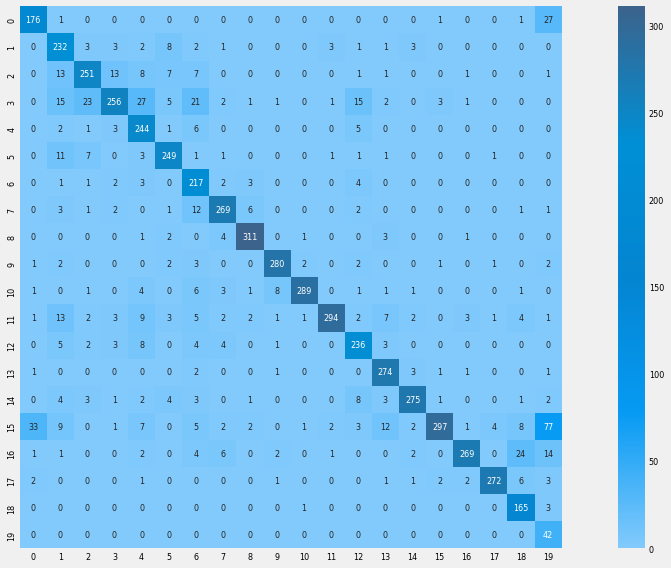

In [21]:
import seaborn as sns
cm = confusion_matrix(y,t_test)
plt.figure(figsize=(16,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='d', annot_kws={'size': 8}, cmap=cmap)
plt.tight_layout()
plt.show()

In [22]:
print(classification_report(y,t_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       206
           1       0.74      0.90      0.81       259
           2       0.85      0.83      0.84       303
           3       0.89      0.69      0.78       373
           4       0.76      0.93      0.84       262
           5       0.88      0.90      0.89       276
           6       0.73      0.93      0.82       233
           7       0.91      0.90      0.91       298
           8       0.95      0.96      0.96       323
           9       0.95      0.95      0.95       296
          10       0.98      0.91      0.94       317
          11       0.97      0.83      0.89       356
          12       0.84      0.89      0.86       266
          13       0.89      0.96      0.92       284
          14       0.95      0.89      0.92       308
          15       0.97      0.64      0.77       466
          16       0.96      0.83      0.89       326
          17       0.97    

In [23]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='rbf', class_weight='balanced', C=1e3, gamma=0.0001)

clf_svm = clf_svm.fit(X_train, t_train)
y_svm = clf_svm.predict(X_test)
print(accuracy_score(y_svm, t_test))

In [ ]:
cm = confusion_matrix(y_svm,t_test)
plt.figure(figsize=(16,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='d', annot_kws={'size': 8}, cmap=cmap)
plt.tight_layout()
plt.show()

In [24]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=15, random_state=42)

text_clf_svm = text_clf_svm.fit(X_train, t_train)
y_sgd = text_clf_svm.predict(X_test)
print(accuracy_score(y_sgd, t_test))

0.8822072868765476


In [25]:
text_clf_lr = SGDClassifier(loss='log', penalty='l2', alpha=1e-3, max_iter=15, random_state=42)

text_clf_lr = text_clf_lr.fit(X_train, t_train)
y_lr = text_clf_lr.predict(X_test)
print(accuracy_score(y_lr, t_test))

0.8013795542978422


In [26]:
# Grid Search
# Here, we are creating a list of parameters for which we would like to do performance tuning. 
# All the parameters name start with the classifier name (remember the arbitrary name we gave). 
# E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

from sklearn.model_selection import GridSearchCV
parameters = {'alpha': (1e-2, 1e-3)}

In [27]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.

gs_clf = GridSearchCV(text_clf_svm, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_red, t)

In [28]:
# To see the best mean score and the params, run the following code

gs_clf.best_score_
gs_clf.best_params_

# Output for above should be: The accuracy has now increased to ~90.6% for the NB classifier (not so naive anymore! 😄)
# and the corresponding parameters are {‘clf__alpha’: 0.01, ‘tfidf__use_idf’: True, ‘vect__ngram_range’: (1, 2)}.

{'alpha': 0.001}